# Data analysis

In [1]:
import os
import sys

# set the working dir to the parent working dir
current_working_dir = os.getcwd()
print(f'Previous working dir: {current_working_dir}')
new_working_dir = current_working_dir.replace('notebooks', '')
os.chdir(new_working_dir)
sys.path.insert(0, new_working_dir)
print(f'Current working dir: {os.getcwd()}')

Previous working dir: /home/albert/PycharmProjects/traffic_sign_recognition/notebooks
Current working dir: /home/albert/PycharmProjects/traffic_sign_recognition


## 1. Data Imbalance
Check whether there is an inbalance in the class sizes (are there classes with way less or way more examples then the others).

Conclusion:
There is a great inbalance among the classes: there are some with ... and some with ... elements, hence a method should be used for rebalancing them.

Possible methods:
<ol>
  <li>Under-sampling: sample elements to train from the larger classes (it can be different for every epoch to use all examples for the whole training). </li>
  <li>Over-sampling: reuse elements from the smaller classes (it should be augmented and can be different for every epoch to minimize overfitting). </li>
  <li>Ensemble: use ensemble of models trained on the small classes and different brackets of the larger classes (it is computationally expensive). </li>
</ol>

[12  3 34 36  6 18  7 35  8 13 22 33 29  1 31 20 27 28  2 14 15  5 30 32
 24 17 10 21 16 19 11  9 25 26  0 23  4]


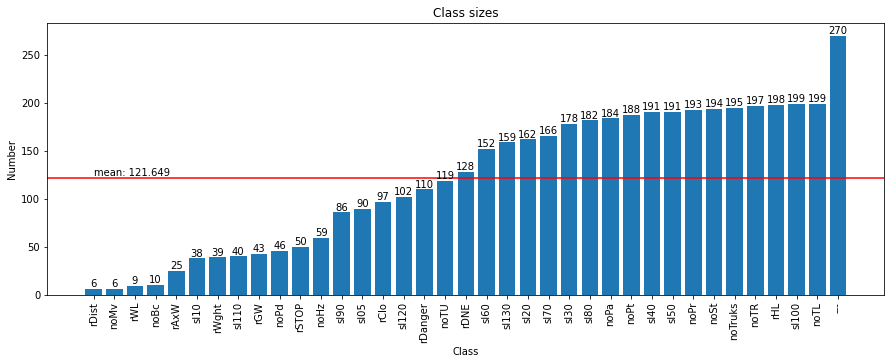

In [36]:
# show the class sizes
from data.read_data import read_paths
import matplotlib.pyplot as plt
import numpy as np

# load the data and get the class names and sizes
paths = read_paths('/home/albert/data/R-jpg')
class_sizes_dict = {key: len(value) for key, value in paths.items()}
class_sizes = np.array(list(class_sizes_dict.values()))
class_sizes_mean = np.mean(class_sizes)
class_names = np.array(list(class_sizes_dict.keys()))

# sort the classes according to the class size
sorting_indices = np.argsort(class_sizes)
print(sorting_indices)
class_sizes = class_sizes[sorting_indices]
class_names = class_names[sorting_indices]

# plot
fig = plt.figure(figsize=[15, 5])
plt.bar(class_names, class_sizes)
plt.axhline(class_sizes_mean, color="red")
plt.text(0, class_sizes_mean, f'mean: {class_sizes_mean:.3f}', va='bottom', ha="left")
plt.xticks(rotation=90)
plt.title('Class sizes')
plt.xlabel('Class')
plt.ylabel('Number')
for i in range(len(class_sizes)):
    plt.annotate(str(class_sizes[i]), 
                 xy=(class_names[i],class_sizes[i]), 
                 ha='center', va='bottom')
plt.show()

## 2. Lighting 

The colors and the structure of the sign defines the class of the sign, while the lighting is usually due to the environment during the recording. As recordings can have different lighting conditions, some classes can have different lighting distributions among their images. If these are heavy enough a machine learning model can overfit just to differentiate classes according to their usual lighting.

To solve this one can rescale the lighting of the images to be the same during preprocessing. Furthermore, assuming that the real world lighting values can range mostly the same as in the ones in the dataset, the datapoints can be augmented to randomly have the same ligthing values.